# General Setup

In [15]:
# %matplotlib widget

from pyCascade import probePost, physics, quantities
from matplotlib import pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

category =  "config1"



In [16]:
############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)

'/scratch/users/nbachand/Cascade/city_block_cfd'

'/home/users/nbachand/Cascade/city_block_cfd'

# Run

In [17]:
run = 1
qois = ['comp(u,0)', 'comp(u,2)']

In [18]:
probes = probePost.Probes(f'{scratch_dir}/CHARLES/{category}/R{run}/probes/probesOut')
probes.get_locations(f'{scratch_dir}/CHARLES/{category}/R{run}/probes/locations')

In [19]:
stack = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

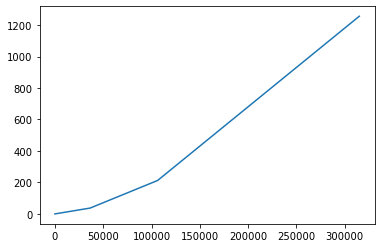

In [20]:
plt.plot(probes.probe_steps, probes.probe_times)

In [33]:
qty_dict = probes.create_qty_dict(
    names = ["col_9-6"],#[name for name in  probes.probe_names if "col" in name], 
    steps = probes.probe_steps[-100000:-1:],
    stack = stack,
)


processing data took 29 seconds


## Spectra

/home/users/nbachand/Cascade/city_block_cfd/pyCascade/quantities.py:263: RuntimeWarning: divide by zero encountered in power
  ax.loglog(qty.f, interial_offset*qty.f**(-5/3), label = '-5/3')


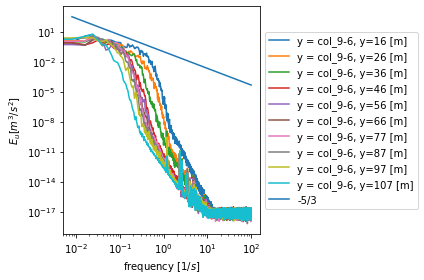

In [35]:
fig, ax = quantities.plot_power_spectra(qty_dict)

## Plot ABL

/home/users/nbachand/Cascade/city_block_cfd/pyCascade/physics.py:7: RuntimeWarning: divide by zero encountered in true_divide
  z_scaled = (z - disp)/z0


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='mean velocity [m/s]', ylabel='height [m]'>)

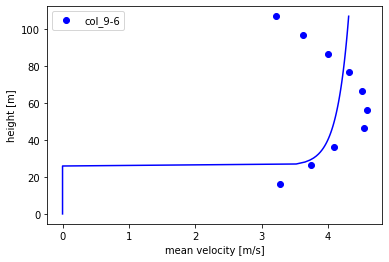

In [36]:
quantities.plot_ABL(qty_dict, fit_disp=True)

## Plot Length Scales

(<Figure size 432x288 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Lx'}, xlabel='y [m]', ylabel='L [m]'>,
        <AxesSubplot:title={'center':'Ly'}, xlabel='y [m]'>,
        <AxesSubplot:title={'center':'Lz'}, xlabel='y [m]'>], dtype=object))

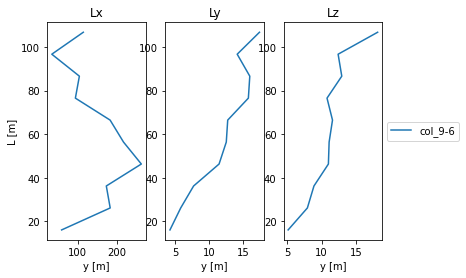

In [37]:
quantities.plot_length_scales(qty_dict)

## Plot Reynolds stresses

(<Figure size 432x288 with 6 Axes>,
 array([[<AxesSubplot:title={'center':'uu'}, ylabel='y [m]'>,
         <AxesSubplot:title={'center':'vv'}>,
         <AxesSubplot:title={'center':'ww'}>],
        [<AxesSubplot:title={'center':'uv'}, ylabel='y [m]'>,
         <AxesSubplot:title={'center':'uw'}, xlabel='Reynolds Stress [m^2/s^2]'>,
         <AxesSubplot:title={'center':'vw'}>]], dtype=object))

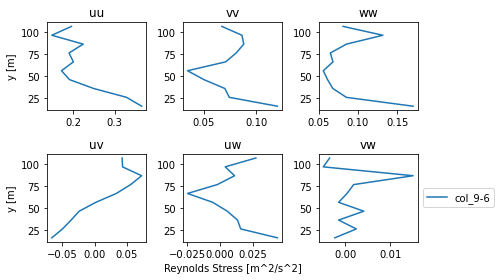

In [38]:
quantities.plot_reynolds_stresses(qty_dict)

## Plot Turbulence Intensities

(<Figure size 432x288 with 3 Axes>,
 array([<AxesSubplot:xlabel='Iu', ylabel='y [m]'>,
        <AxesSubplot:xlabel='Iv'>, <AxesSubplot:xlabel='Iw'>], dtype=object))

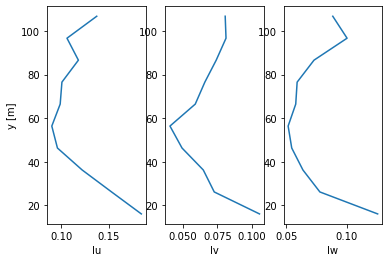

In [39]:
quantities.plot_turbulence_intensities(qty_dict)

## Plot prms

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Prms [Pa]', ylabel='y [m]'>)

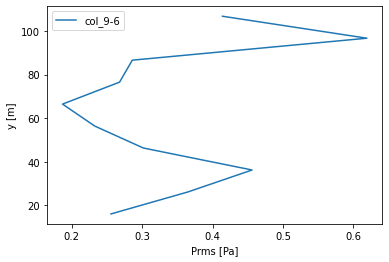

In [40]:
quantities.plot_prms(qty_dict)